# Decision Tree

Decision tree are built by splitting the training set into distinct, where one node contains all of or most of one category data. Decision trees are built using recursive partitioning to classify data.

### Decision Tree Algorithm
1. Choose an attribute from data set
2. Calculate the significance of attribute in splitting of data
3. Split the data based on the value of the best attribute
4. Go to Step-1

#### Entropy :-  
Measure of randomness or uncertainty. <br>
Entropy = $-p(A)*log(p(A)) - p(B)*log(p(B))$

#### Information gain :-
The information that can increase the level of certainty after splitting. <br>
Information gain = (Entropy before split) - (weighted entropy after split)

### Loading the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from io import StringIO
import pydotplus
from sklearn import tree

/home/chaitanya/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Loading the data

In [2]:
data = pd.read_csv("DrugData.csv")

In [3]:
"""
    X (ndarray): The feature matrix containing the columns 'Age', 'Sex', 'BP', 'Cholesterol', and 'Na_to_K'.
    Y (Series): The target variable containing the column 'Drug'.
"""

X = data[["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]].values
Y = data["Drug"]

In [4]:
# Encode categorical features using LabelEncoder
sex = preprocessing.LabelEncoder()
sex.fit(["F", "M"])
X[:,1] = sex.transform(X[:,1])

BP = preprocessing.LabelEncoder()
BP.fit(["LOW", "NORMAL", "HIGH"])
X[:,2] = BP.transform(X[:,2])

Cholesterol = preprocessing.LabelEncoder()
Cholesterol.fit(["NORMAL", "HIGH"])
X[:,3] = Cholesterol.transform(X[:,3])

In [5]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)
print("Shape of X Training set : {} and Size of Y Training set : {}".format(X_train.shape, Y_train.shape))
print("Shape of X Testing set : {} and Size of Y Testing set : {}".format(X_test.shape, Y_test.shape))

Shape of X Training set : (140, 5) and Size of Y Training set : (140,)
Shape of X Testing set : (60, 5) and Size of Y Testing set : (60,)


In [6]:
"""
Training a decision tree classifier using the entropy criterion and a maximum depth of 4.
It fits the classifier to the training data (X_train, Y_train) and predicts the labels for the test data (X_test).
"""

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
drugTree.fit(X_train, Y_train)
predictedTree = drugTree.predict(X_test)

In [7]:
print("Accuracy : {0:.2f}".format(metrics.accuracy_score(Y_test, predictedTree)))

Accuracy : 0.98


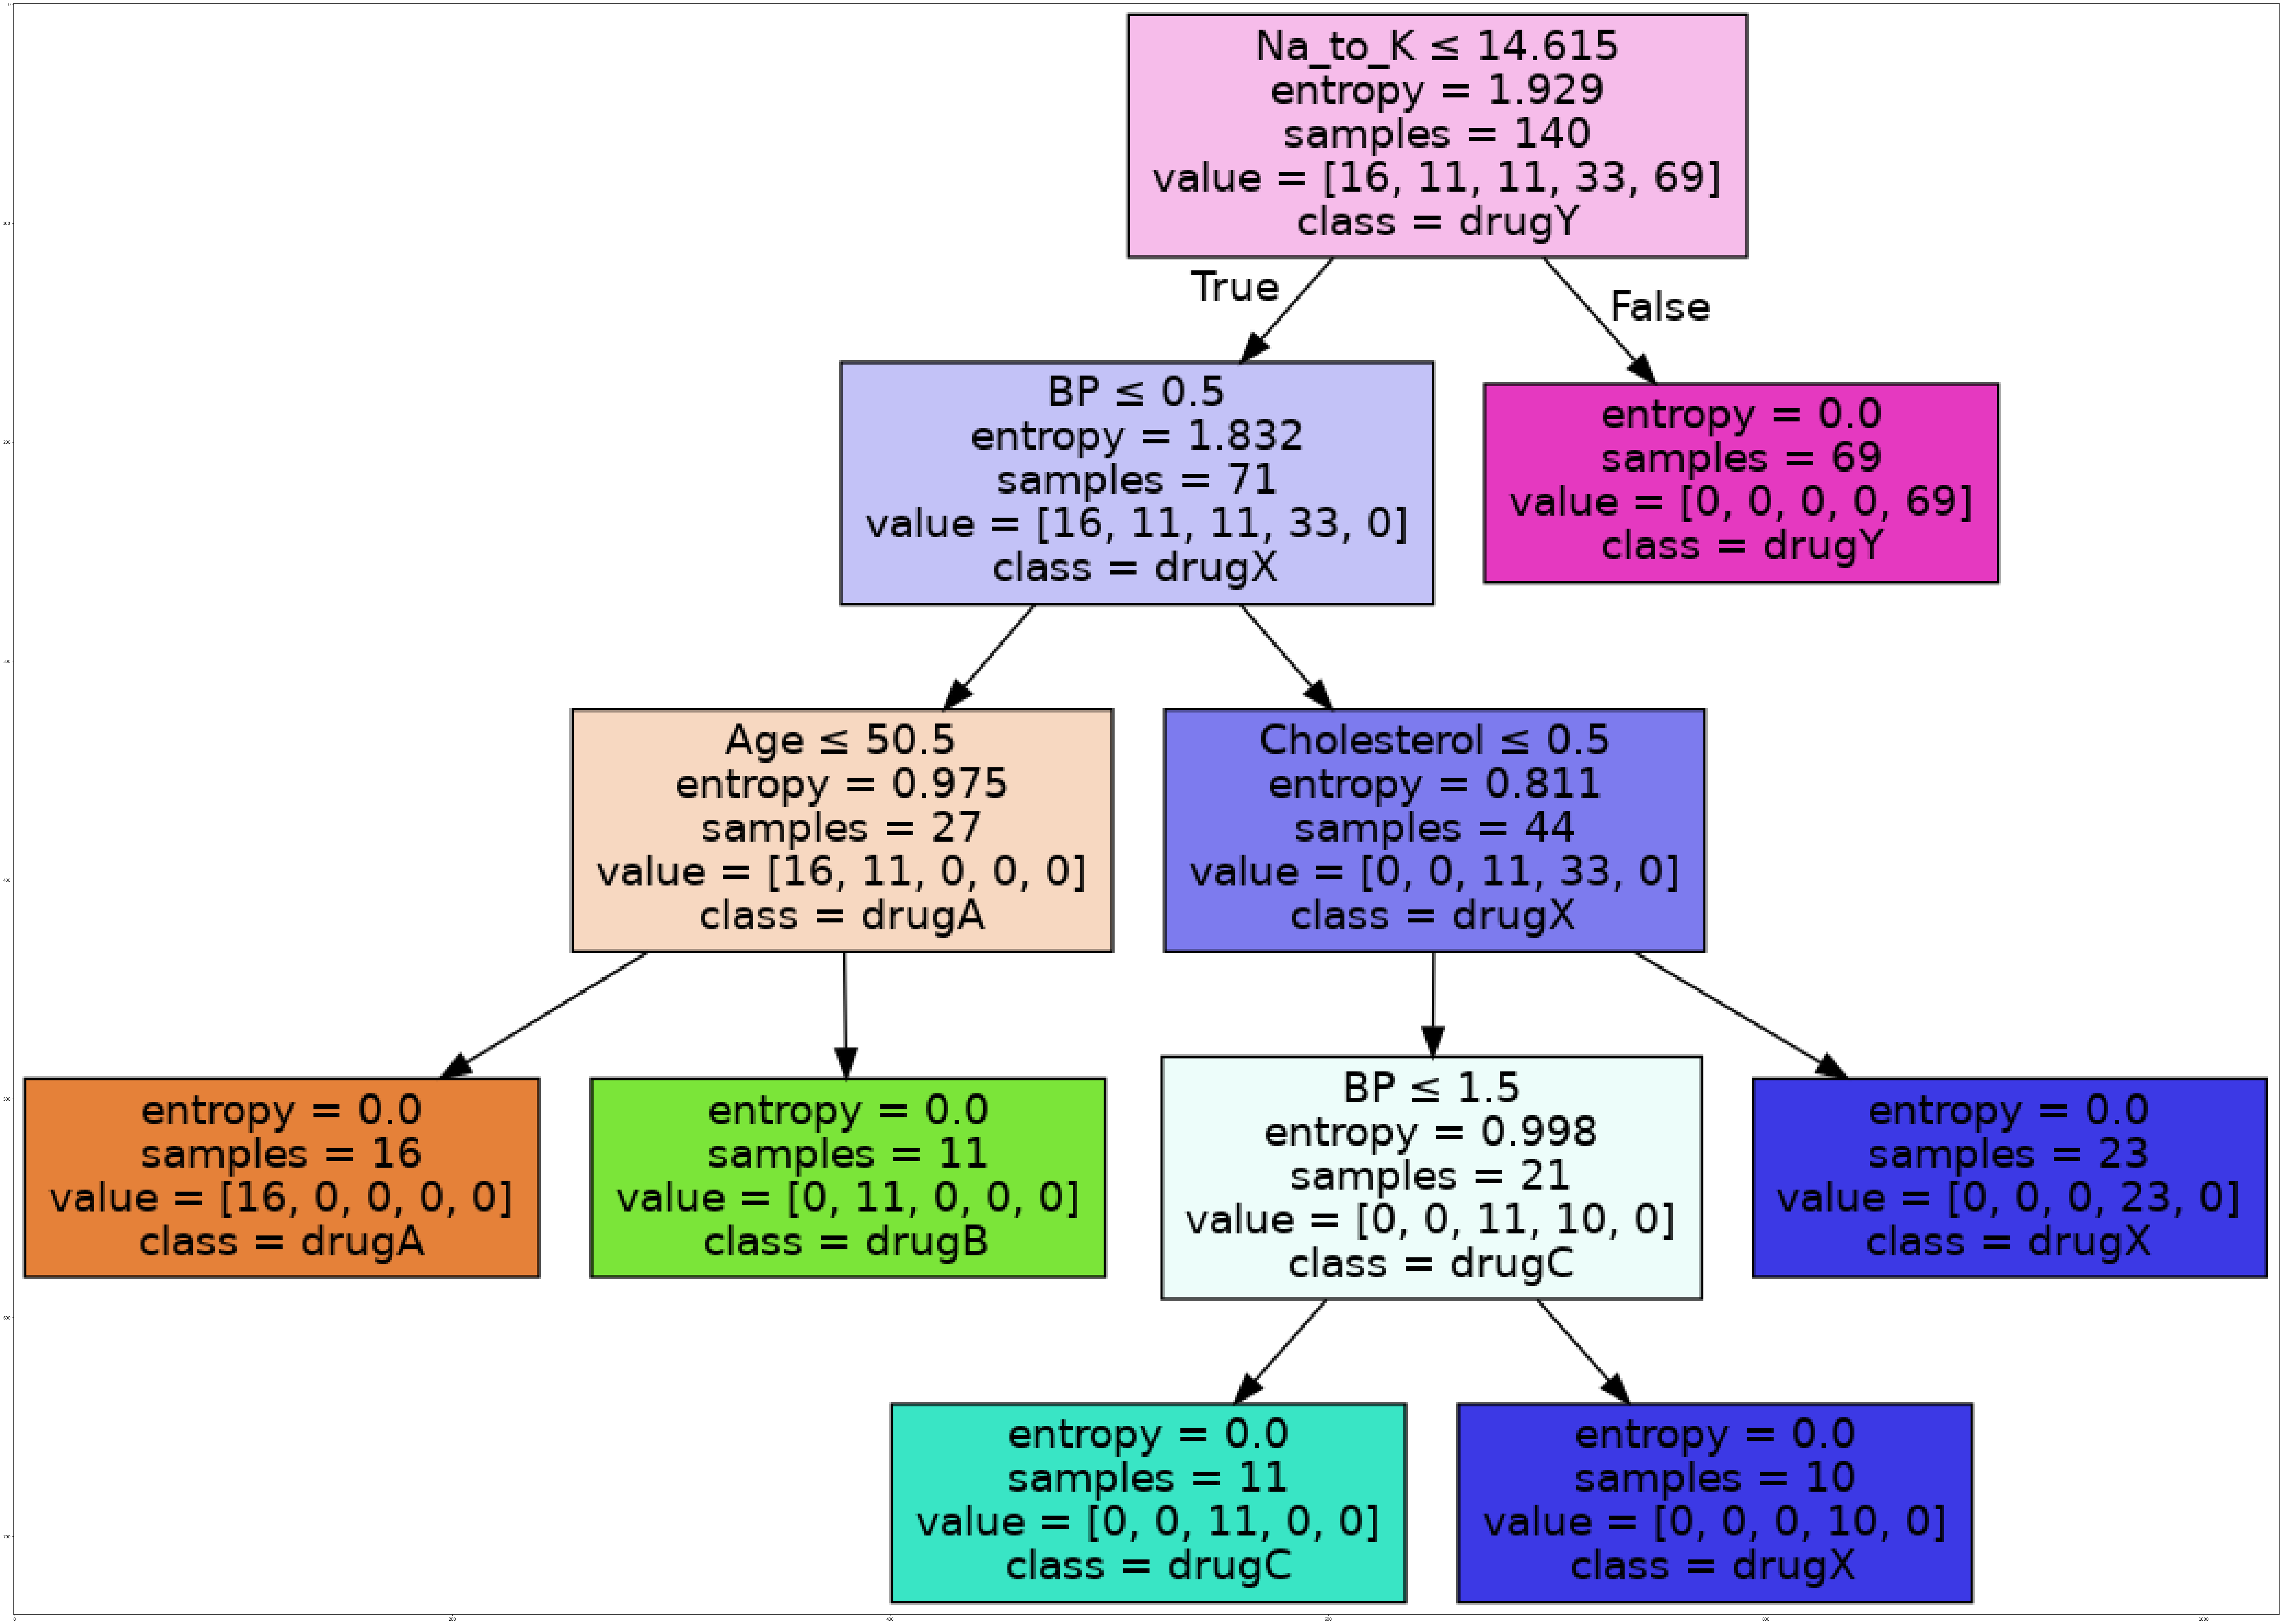

In [8]:
# Create a StringIO object to store the dot data
dot_data = StringIO()

# Get the feature names from the data columns
feature_name = data.columns[0:5]

# Export the decision tree as dot data
output = tree.export_graphviz(drugTree, feature_names=feature_name, out_file=dot_data, class_names=np.unique(Y_train), filled=True, special_characters=True, rotate=False)

# Create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Write the graph to a PNG file
graph.write_png("DrugTree.png")

# Read the PNG image
image = mpimg.imread("DrugTree.png")

# Display the image
plt.figure(figsize=(100, 200))
plt.imshow(image, interpolation="nearest")
